<a href="https://colab.research.google.com/github/Bborub/baseball/blob/main/DSC502_040523_hierarchical_clustering_mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agglomerative (bottom up) hierarchical clustering


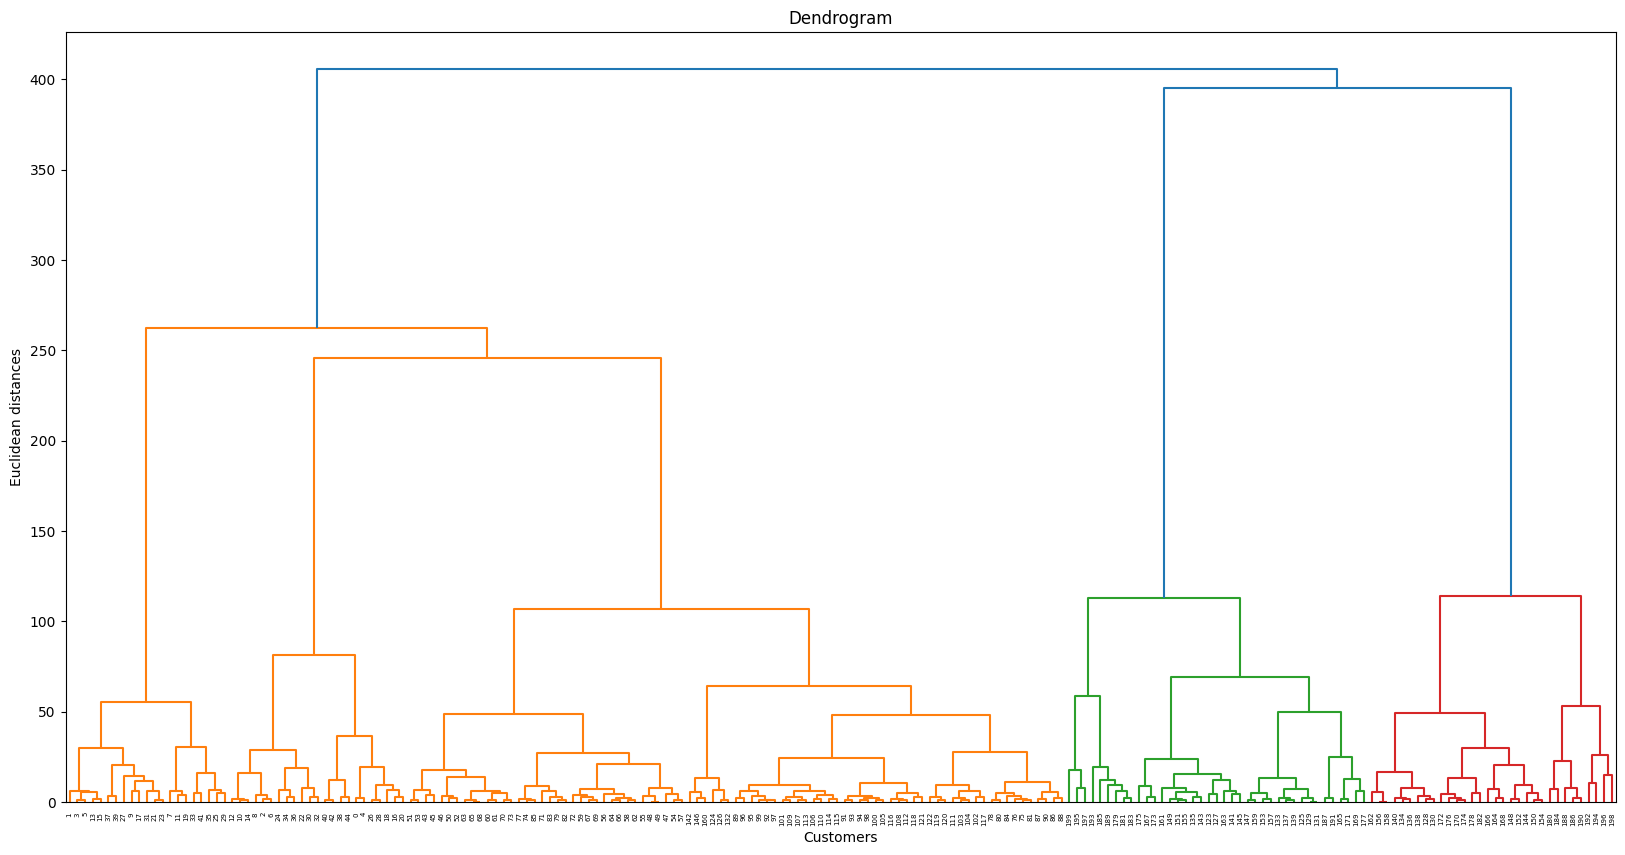

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

df = pd.read_csv('https://storage.googleapis.com/scsu-data-science/mall_customers.csv')
X = df.loc[:, ['Annual Income (k$)','Spending Score (1-100)']].values

plt.rcParams["figure.figsize"] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

dataset = pd.read_csv('https://storage.googleapis.com/scsu-data-science/mall_customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


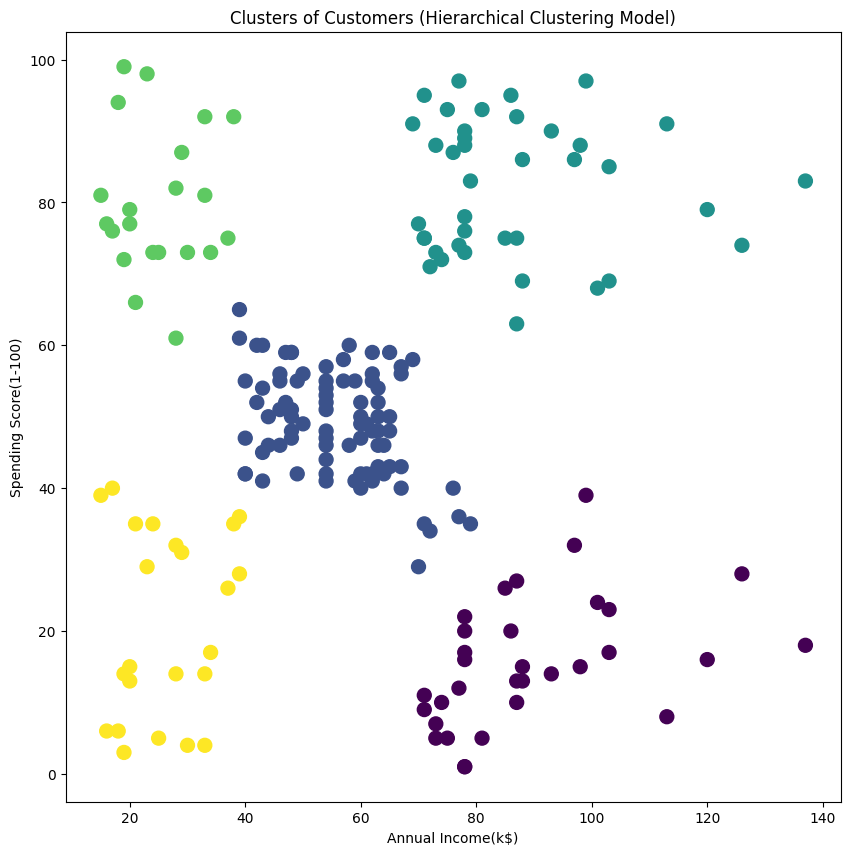

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage ='ward')

# Generate the cluster labels of the customers.
y_hc = hc.fit_predict(X)

plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(X[:, 0], X[:, 1], c = y_hc, s = 100)

plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Plotting differences between k-Means and Hierarchical clustering

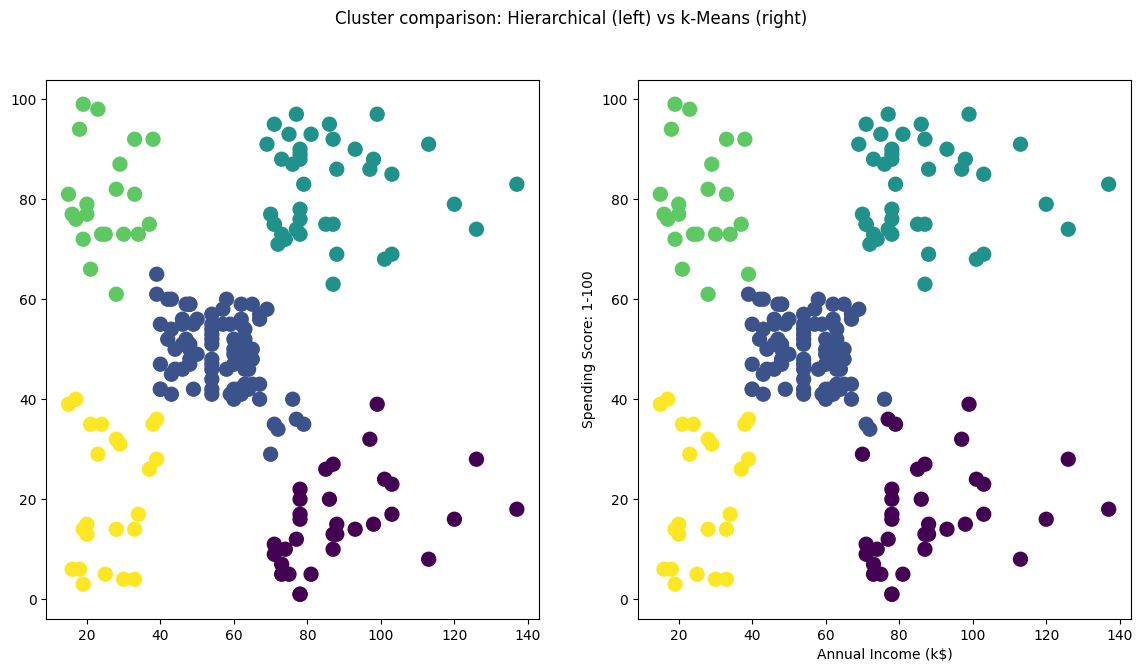

In [ ]:
from sklearn.cluster import KMeans
plt.rcParams["figure.figsize"] = (14,7)

kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X)

plt.rcParams["figure.figsize"] = (14,7)
fig, (ax1, ax2) = plt.subplots(1, 2)

# colors = ['red', 'green', 'magenta', 'blue', 'cyan']
ax1.scatter(X[:, 0], X[:, 1], c = y_hc, s = 100)
ax2.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 100)

plt.suptitle('Cluster comparison: Hierarchical (left) vs k-Means (right)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score: 1-100')
plt.show()

# Handling non-convex datasets

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


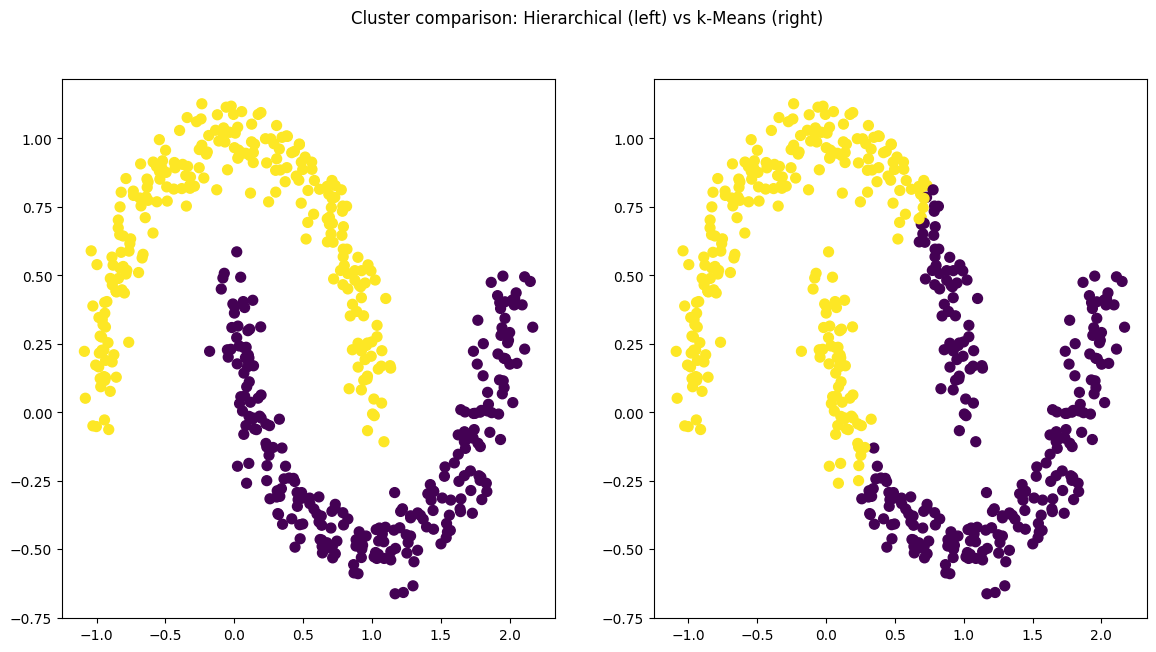

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

X, _ = make_moons(500, noise = 0.08)

kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(X)

# linkage changed to 'single'
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='single')
y_hc = hc.fit_predict(X)

plt.rcParams["figure.figsize"] = (14,7)
fig, (ax1, ax2) = plt.subplots(1, 2)

plt.suptitle('Cluster comparison: Hierarchical (left) vs k-Means (right)')
ax1.scatter(X[:, 0], X[:, 1], c = y_hc, s = 50, cmap = 'viridis')
ax2.scatter(X[:, 0], X[:, 1], c=y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_